In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, GRU, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [2]:
# R2 Score
CNN = [17.30643391609192, 17.191336631774902, 21.717875719070435, 26.395065546035767, 30.908891201019287, 35.61316156387329, 40.116097927093506]
LSTM = [16.062445402145386, 24.581204414367676, 35.14206647872925, 45.596832036972046, 57.71936774253845, 68.09236812591553, 79.03751587867737]
CNN_LSTM = [17.942234992980957, 22.918757915496826, 31.494144916534424, 40.56195378303528, 49.54237365722656, 58.22453308105469, 67.1176495552063]

In [3]:
print(CNN_LSTM)

[17.942234992980957, 22.918757915496826, 31.494144916534424, 40.56195378303528, 49.54237365722656, 58.22453308105469, 67.1176495552063]


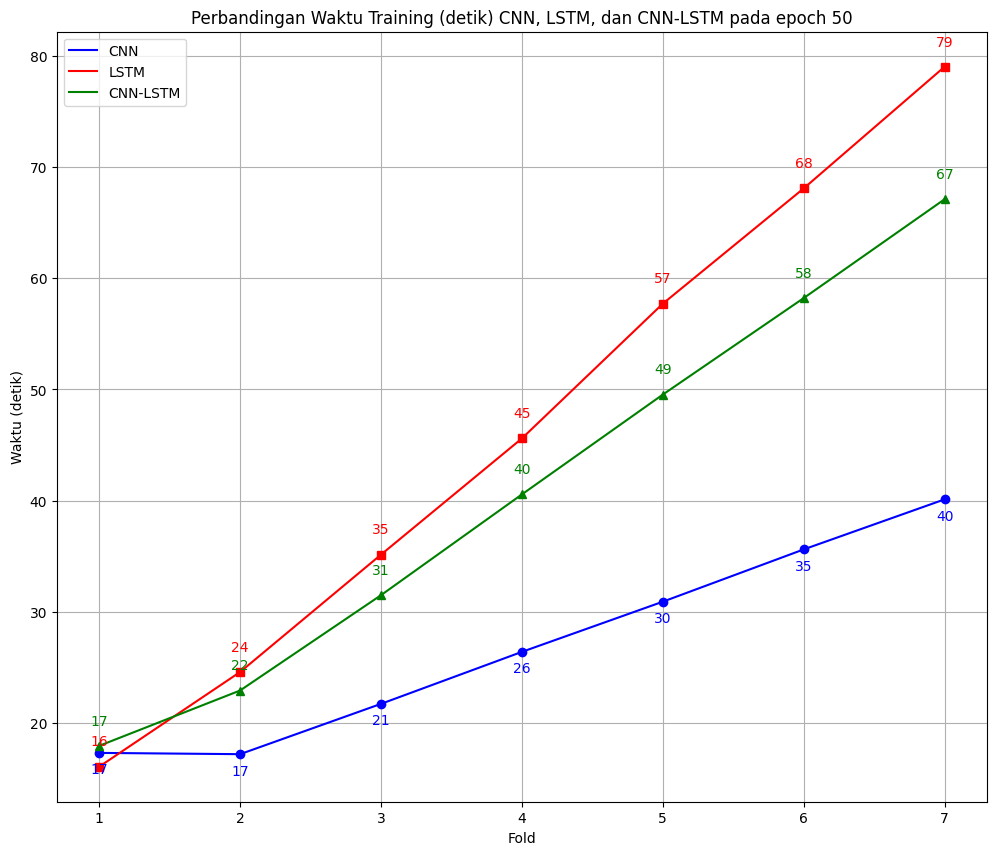

In [4]:

folds = np.arange(1, len(CNN) + 1)


plt.figure(figsize=(12, 10))

# CNN
cnn_folds, cnn_scores = [], []
for i in range(len(CNN)):
    if CNN[i] >= 0:
        plt.plot(folds[i], CNN[i], 'bo')
        plt.annotate(f'{int(CNN[i])}', (folds[i], CNN[i]), textcoords="offset points", xytext=(0,-15), ha='center', color='blue')
        cnn_folds.append(folds[i])
        cnn_scores.append(CNN[i])

plt.plot(cnn_folds, cnn_scores, 'b-', label='CNN')

#LSTM
lstm_folds, lstm_scores = [], []
for i in range(len(LSTM)):
    if LSTM[i] >= 0:
        plt.plot(folds[i], LSTM[i], 'rs')
        plt.annotate(f'{int(LSTM[i])}', (folds[i], LSTM[i]), textcoords="offset points", xytext=(0,15), ha='center', color='red')
        lstm_folds.append(folds[i])
        lstm_scores.append(LSTM[i])

plt.plot(lstm_folds, lstm_scores, 'r-', label='LSTM')

# CNN-LSTM
cnn_lstm_folds, cnn_lstm_scores = [], []
for i in range(len(CNN_LSTM)):
    if CNN_LSTM[i] >= 0:
        plt.plot(folds[i], CNN_LSTM[i], 'g^')
        plt.annotate(f'{int(CNN_LSTM[i])}', (folds[i], CNN_LSTM[i]), textcoords="offset points", xytext=(0,15), ha='center', color='green')
        cnn_lstm_folds.append(folds[i])
        cnn_lstm_scores.append(CNN_LSTM[i])

plt.plot(cnn_lstm_folds, cnn_lstm_scores, 'g-', label='CNN-LSTM')

plt.xlabel('Fold')
plt.ylabel('Waktu (detik)')
plt.title('Perbandingan Waktu Training (detik) CNN, LSTM, dan CNN-LSTM pada epoch 50')
plt.yscale('linear')  # Use linear scale for R2 score
plt.legend()
plt.grid(True)

# Show the plot
plt.show()